# Garnet Problem

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#define cardinality of state space, actino space and branching factor
N_S = 10
N_A = 5
N_B = 2

In [2]:
def generateTransitionPr(N_S, N_A, N_B):
    
    N_B = 2 # the function only works for N_B = 2
    
    P = np.zeros((N_S, N_S, N_A)) # s' x s x a, P(s'|s,a)
    
    for i in range(N_S):  # loop over all s
        for j in range(N_A): # loop over all a
            
            idx = [] # indices to be given non-zero transition probability
        
            while (len(idx) < N_B):
                rand = np.random.randint(N_S)
                
                if rand not in idx:
                    idx.append(rand)
            
            # only works for N_B = 2
            uni = np.random.uniform()
            P[idx, i, j] = uni, 1-uni
                
    
    return P

In [3]:
def generateReward(N_S, N_A):
    return np.random.uniform(size=(N_S,N_A)) # s x a, R(s,a)

In [4]:
def generatePolicy(N_S, N_A):
    # uniform random policy
    pi = np.ones((N_A, N_S))/N_A # a x s, pi(a|s)
    return pi

In [5]:
def generateAction(N_A, pi, s):
    return np.random.choice(np.arange(N_A),p=pi[:,s])

In [6]:
def generateNextState(N_S, P, s, a):
    return np.random.choice(np.arange(N_S),p=P[:,s,a])

In [7]:
def generateSequence(N_S, N_A, P, R, pi, gamma, T):
    
    s = np.random.randint(N_S)
    print("Step 1\nState:",s)
    
    for t in range(2,T+1):
        
        a = generateAction(N_A, pi, s)
        r = R[s,a]
        s = generateNextState(N_S, P, s, a)
        
        print("Action:",a)
        print("Reward:",r)
        print()
        print("Step",t,"\nState:",s)

In [8]:
def generateOneStep(N_S, N_A, P, R, pi, s):
    
    a = generateAction(N_A, pi, s)
    r = R[s,a]
    s_next = generateNextState(N_S, P, s, a)
    
    return a, r, s_next

## Generate Garnet Problem

In [12]:
N_S = 50
N_A = 5
N_B = 2

P = generateTransitionPr(N_S, N_A, N_B)
R = generateReward(N_S, N_A)
pi = generatePolicy(N_S, N_A)

alpha = 0.1
gamma = 0.9

## True State Values

In [748]:
stateTransitionMatrix = np.sum(P, axis=2).T / N_A
rewardMatrix = np.sum(R, axis = 1, keepdims=True) / N_A

In [749]:
V = np.dot(np.linalg.inv(np.identity(N_S)-gamma*stateTransitionMatrix),rewardMatrix)

In [547]:
#V

## V_star

In [314]:
def optimalValue(N_S, N_A, P, R, pi, alpha, gamma, T):
    
    # initial state
    s = np.random.randint(N_S)
    
    
    for t in range(2, T+1):
        
        a, r, s_next = generateOneStep(N_S, N_A, P, R, pi, s)
        
        # TD learning
        V_star[s] = V_star[s] + alpha * (r + gamma * V_star[s_next] - V_star[s])
            
        # update current state
        s = s_next

In [315]:
#V_star = np.zeros((N_S,1))

In [316]:
#optimalValue(N_S, N_A, P, R, pi, 0.00001, gamma, 100000)

In [313]:
#V_star

array([[4.67541946],
       [4.73386313],
       [4.66157227],
       [4.36105555],
       [4.30530134],
       [4.51182184],
       [4.59122116],
       [4.31433774],
       [4.38332381],
       [4.50022743]])

## Task 1: V_TD & V_MC

In [205]:
V_TD = np.zeros((N_S,1))
V_MC = np.zeros((N_S,2))   # [value, number of times this state has been visited]

In [206]:
T = 10000 # length of each sequence
E = 10 # number of sequences

In [207]:
def evaluation(N_S, N_A, P, R, pi, alpha, gamma, T, V_MC, V_TD):
    
    """
        N_S: number of states
        N_A: number of actions
        P: transition probability matrix (s' x s x a)
        R: reward (s x a)
        pi: policy (a x s)
        alpha: stepsize for TD learning
        gamma: discount factor
        T: sequence length
    """
    
    # initial state
    s = np.random.randint(N_S)
    
    # sequence of states and rewards
    states = [s]
    rewards = []
    
    for t in range(2, T+1):
        
        a, r, s_next = generateOneStep(N_S, N_A, P, R, pi, s)
        
        # update sequence
        states.append(s_next)
        rewards.append(r)
        
        # TD learning
        V_TD[s] = V_TD[s] + alpha * (r + gamma * V_TD[s_next] - V_TD[s])
        
        # update current state
        s = s_next
    
    #print(states)
    #print(rewards)
    
    # MC (every-visit)
    r = 0
    
    for t in reversed(range(T-1)):
        
        r = gamma * r + rewards[t]
        
        V_MC[states[t]][1] = V_MC[states[t]][1] + 1
        V_MC[states[t]][0] = V_MC[states[t]][0] + (r - V_MC[states[t]][0])/V_MC[states[t]][1]

    return V_MC, V_TD
    

In [238]:
for _ in range(E):
    V_MC, V_TD = evaluation(N_S, N_A, P, R, pi, alpha, gamma, T, V_MC, V_TD)

In [239]:
print(V_MC)
print(V_TD)

[[5.14510555e+00 7.09590000e+04]
 [5.11481722e+00 1.28982000e+05]
 [4.91288829e+00 9.92900000e+04]
 [5.04714196e+00 1.43541000e+05]
 [5.27850396e+00 1.52266000e+05]
 [5.07641418e+00 1.39027000e+05]
 [4.91759826e+00 8.23360000e+04]
 [5.10992286e+00 9.64880000e+04]
 [5.04153828e+00 9.31380000e+04]
 [5.21110905e+00 9.38630000e+04]]
[[5.12817914]
 [5.16299375]
 [4.99719552]
 [4.98262651]
 [5.17030426]
 [4.94017445]
 [4.7741281 ]
 [5.04512511]
 [5.05481311]
 [5.17857268]]


In [240]:
error(V_MC, V_TD)

Error of MC method: 0.023989950473024487
Error of TD method: 0.007601013021978005


(0.023989950473024487, 0.007601013021978005)

### Analysis

In [317]:
def error(V_MC, V_TD):
    
    MC = np.mean((V - V_MC[:,0])**2)
    TD = np.mean((V - V_TD)**2)
    
    print("Error of MC method:",MC)
    print("Error of TD method:", TD)
    
    return MC, TD

In [319]:
error(V_MC, V_TD)

Error of MC method: 0.36422396253677225
Error of TD method: 0.3220738825787399


(0.36422396253677225, 0.3220738825787399)

In [280]:
def MSEvsT(N, T_min, T_max, stepsize, alpha):
    
    mse_MC = []
    mse_TD = []
    Ts = []
    
    # average of MSE over N trials
    for T in range(T_min, T_max+1, stepsize):
        
        print("T:",T)
        error_MC = []
        error_TD = []
        
        for n in range(N):
            
            print("  n:",n)
            
            V_TD = np.zeros((N_S,1))
            V_MC = np.zeros((N_S,2))
            
            V_MC, V_TD = evaluation(N_S, N_A, P, R, pi, alpha, gamma, T, V_MC, V_TD) 
            
            MC, TD = error(V_MC, V_TD)
            
            error_MC.append(MC)
            error_TD.append(TD)
        
        mse_MC.append(np.mean(error_MC))
        mse_TD.append(np.mean(error_TD))
        Ts.append(T)
        
    plt.plot(Ts,mse_MC,'r',label="MC")
    plt.plot(Ts,mse_TD,'b',label="TD")
    plt.xlabel('Sequence Length T')
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

T: 10000
  n: 0
Error of MC method: 0.04407466756639846
Error of TD method: 0.011786917271553633
T: 20000
  n: 0
Error of MC method: 0.04466211409066613
Error of TD method: 0.0021570330827482636
T: 30000
  n: 0
Error of MC method: 0.04411150704620709
Error of TD method: 0.013180680259613872
T: 40000
  n: 0
Error of MC method: 0.04647805442320936
Error of TD method: 0.0026075978233766626
T: 50000
  n: 0
Error of MC method: 0.04460278185961104
Error of TD method: 0.008447921138608561
T: 60000
  n: 0
Error of MC method: 0.04560646299397246
Error of TD method: 0.0031933236716468207
T: 70000
  n: 0
Error of MC method: 0.04623097512129216
Error of TD method: 0.0035475023831159414
T: 80000
  n: 0
Error of MC method: 0.04446782566600041
Error of TD method: 0.0080755261120317
T: 90000
  n: 0
Error of MC method: 0.045077280898911415
Error of TD method: 0.0024916301794778
T: 100000
  n: 0
Error of MC method: 0.04667168223302162
Error of TD method: 0.01914963673511139
T: 110000
  n: 0
Error of MC 

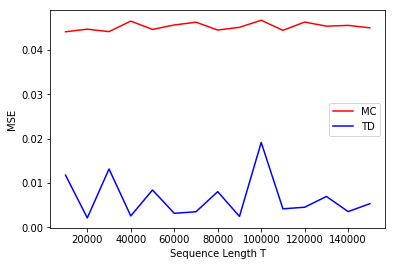

In [320]:
MSEvsT(1, 10000, 150000, 10000, 0.1)

T: 10000
  n: 0
Error of MC method: 0.047809074189931806
Error of TD method: 16.75391837327854
T: 20000
  n: 0
Error of MC method: 0.04456005321782816
Error of TD method: 13.744965300592806
T: 30000
  n: 0
Error of MC method: 0.04653644861767501
Error of TD method: 11.26555827353511
T: 40000
  n: 0
Error of MC method: 0.04567989906476701
Error of TD method: 9.282827464241674
T: 50000
  n: 0
Error of MC method: 0.04370193119530428
Error of TD method: 7.639907711817346
T: 60000
  n: 0
Error of MC method: 0.045984750400810494
Error of TD method: 6.293263584384199
T: 70000
  n: 0
Error of MC method: 0.04502873381260192
Error of TD method: 5.138140643230864
T: 80000
  n: 0
Error of MC method: 0.04688835649506461
Error of TD method: 4.205619688586522
T: 90000
  n: 0
Error of MC method: 0.044866547793209824
Error of TD method: 3.485904686164859
T: 100000
  n: 0
Error of MC method: 0.04552795129274516
Error of TD method: 2.8772509406629045
T: 110000
  n: 0
Error of MC method: 0.044781033974296

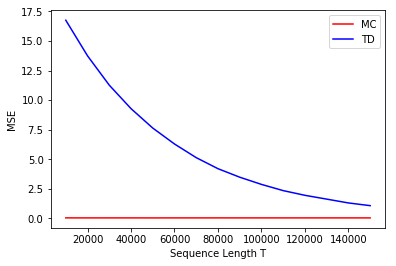

In [321]:
MSEvsT(1, 10000, 150000, 10000, 0.001)

T: 10000
  n: 0
Error of MC method: 0.043241324275620344
Error of TD method: 2.7931742519527276
T: 20000
  n: 0
Error of MC method: 0.04766109056978968
Error of TD method: 0.3905336195389734
T: 30000
  n: 0
Error of MC method: 0.04462323216228922
Error of TD method: 0.050812189461372004
T: 40000
  n: 0
Error of MC method: 0.045532501531874846
Error of TD method: 0.006764154430474617
T: 50000
  n: 0
Error of MC method: 0.04503574773286677
Error of TD method: 0.0008121177376510158
T: 60000
  n: 0
Error of MC method: 0.04405761491296602
Error of TD method: 0.0013351690903901036
T: 70000
  n: 0
Error of MC method: 0.045876465466060425
Error of TD method: 0.0004750535675585729
T: 80000
  n: 0
Error of MC method: 0.045772613295782374
Error of TD method: 0.0014561914608849339
T: 90000
  n: 0
Error of MC method: 0.045148002116260744
Error of TD method: 0.00017380889204572273
T: 100000
  n: 0
Error of MC method: 0.04534162407730506
Error of TD method: 0.0007077051797824638
T: 110000
  n: 0
Erro

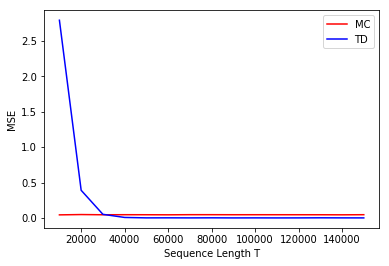

In [322]:
MSEvsT(1, 10000, 150000, 10000, 0.01)

## Task 2: TD with Linear Function Approximation

In [1339]:
def generateFeatureMatrix(N_S,d):
    return np.random.normal(loc=20,size=(N_S,d)) 
# any loc other than 0 will work, the farther away from 0, the faster

In [1340]:
def value(phi,w,s):
    return np.dot(phi[s,:],w)

In [1341]:
#generate garnet problem
N_S = 1000
N_A = 50
N_B = 2

P = generateTransitionPr(N_S, N_A, N_B)
R = generateReward(N_S, N_A)
pi = generatePolicy(N_S, N_A)

alpha = 1e-4
gamma = 0.9

d = 1000 # dimension for feature factor
w = np.zeros((d,1))
phi = generateFeatureMatrix(N_S,d)

In [1346]:
def TD0LFA(N_S, N_A, P, R, pi, phi, w, alpha, gamma, d, T):
    
    # initial state
    s = np.random.randint(N_S)
    
    for t in range(T):
        
        a, r, s_next = generateOneStep(N_S, N_A, P, R, pi, s)
        
        # TD (t+10) is for diminishing
        w = w + alpha/(t+10) *(r + gamma*value(phi,w,s_next) - value(phi,w,s))*phi[np.newaxis,s,:].T
    
    return w

In [1325]:
stateTransitionMatrix = np.sum(P, axis=2).T / N_A
rewardMatrix = np.sum(R, axis = 1, keepdims=True) / N_A
V = np.dot(np.linalg.inv(np.identity(N_S)-gamma*stateTransitionMatrix),rewardMatrix)

In [1331]:
for _ in range(100):
    w = TD0LFA(N_S, N_A, P, R, pi, phi, w, alpha*10, gamma, d, 10000)
    print(MSE(N_A, P, R, phi, w, gamma))
    print(MSE2(N_A, P, R, phi, w, gamma))

0.31570384722479367
24.502696249111516
0.3161803128759664
24.500015994613968
0.3168154881427911
24.495200126211817
0.31673464949467256
24.495835339941088
0.31690800946692943
24.49599366627148
0.317275099318094
24.49634712028927
0.31783333558332555
24.490874265256597
0.3186783567686282
24.481255309247498
0.31871572289682
24.48034331609903
0.31830508063060114
24.461209978364028
0.31880695478777993
24.447704037959113
0.31873020077088837
24.445393556846152
0.3188620401886543
24.441386184929673
0.3202773545704549
24.430431143977835
0.3201804118078035
24.433305918927836
0.3200418339116644
24.435227876658345
0.3204273075558393
24.433280659669936
0.3204164985623864
24.437968407482185
0.3209894695113155
24.423059592917316
0.32086531835873267
24.42119431565859
0.32115239628405656
24.39269566586593
0.3216266813600041
24.37836685786127
0.3221839663439248
24.378915890934156
0.32277095201971456
24.363301652149943
0.3238810188481862
24.359402425524706
0.3239170897022928
24.36829358389274
0.3230940650

0.25799577830525167
24.859042550563302


In [1242]:
phi @ w

array([[3.12471873],
       [3.01209346],
       [3.22528675],
       [3.28416339],
       [3.04264876],
       [3.11952018],
       [2.85368233],
       [3.12857911],
       [2.94586099],
       [3.21108126],
       [3.2165877 ],
       [3.42517474],
       [2.94538269],
       [2.97516287],
       [2.99555007],
       [3.30778678],
       [3.19247952],
       [2.90416737],
       [3.13206044],
       [3.11713196],
       [3.34564128],
       [3.41333172],
       [3.10025426],
       [3.09789863],
       [3.07203068],
       [3.10246004],
       [2.97140993],
       [2.97945368],
       [2.9755463 ],
       [2.91579873],
       [3.16162954],
       [2.9079042 ],
       [3.11711506],
       [2.87645126],
       [3.1782366 ],
       [3.41275063],
       [3.09184732],
       [3.04017871],
       [3.09898647],
       [3.12787514],
       [3.43481421],
       [3.07968964],
       [3.00395765],
       [2.98638412],
       [3.2861774 ],
       [3.47400526],
       [3.13919148],
       [3.212

In [1068]:
#gamma * (stateTransitionMatrix @ phi @ w + rewardMatrix)

In [1192]:
V

array([[4.99908694],
       [4.99734131],
       [4.95595627],
       [5.00913421],
       [5.03159663],
       [4.98836876],
       [4.99835142],
       [4.96116281],
       [5.00908649],
       [4.97583507],
       [4.9827766 ],
       [5.02752546],
       [5.00725133],
       [4.97844836],
       [5.0170173 ],
       [4.9551991 ],
       [5.0450994 ],
       [4.9674043 ],
       [5.00503788],
       [4.96656437],
       [5.01880901],
       [5.01464109],
       [5.00246881],
       [5.04973802],
       [4.96293129],
       [5.01212672],
       [5.0296223 ],
       [5.0052293 ],
       [5.0103015 ],
       [4.95902097],
       [5.01798517],
       [5.01765128],
       [4.9896283 ],
       [4.96135201],
       [5.07800315],
       [4.99534216],
       [5.06128868],
       [4.9684485 ],
       [4.9681699 ],
       [4.97613458],
       [4.99651031],
       [5.09342497],
       [4.91576022],
       [4.94715337],
       [4.96313882],
       [5.00731657],
       [4.95902918],
       [4.993

In [596]:
def MSE(N_A, P, R, phi, w, gamma):
    
    stateTransitionMatrix = np.sum(P, axis=2).T / N_A
    rewardMatrix = np.sum(R, axis = 1, keepdims=True) / N_A
    
    E = phi@w - gamma*(stateTransitionMatrix @ phi @ w) - rewardMatrix
    
    return np.mean(E**2)

In [597]:
def MSE2(N_A, P, R, phi, w, gamma):
    
    stateTransitionMatrix = np.sum(P, axis=2).T / N_A
    rewardMatrix = np.sum(R, axis = 1, keepdims=True) / N_A
    
    E = phi@w - np.dot(np.linalg.inv(np.identity(N_S)-gamma*stateTransitionMatrix),rewardMatrix)
    
    return np.mean(E**2)

### Analysis

In [1347]:
def MSEvsD(N, T, dmin, dmax, stepsize, alpha):
    
    # add tabular and compare performance
    
    MSEs = []
    #MSE2s = []
    ds = []
    
    for d in range(dmin, dmax+1, stepsize):
        
        print("d:",d)
        mse1 = []
        #mse2 = []
        
        for n in range(N):
            
            print("  n:",n)
            
            w = np.zeros((d,1))
            phi = generateFeatureMatrix(N_S,d)
            
            
            w = TD0LFA(N_S, N_A, P, R, pi, phi, w, alpha, gamma, d, T)
            
            ### new training
            
            """
            w = TD0LFA(N_S, N_A, P, R, pi, phi, w, alpha, gamma, d, 10000)
            w = TD0LFA(N_S, N_A, P, R, pi, phi, w, alpha/10, gamma, d, 10000)
            w = TD0LFA(N_S, N_A, P, R, pi, phi, w, alpha/100, gamma, d, 10000)
            w = TD0LFA(N_S, N_A, P, R, pi, phi, w, alpha/1000, gamma, d, 10000)
            w = TD0LFA(N_S, N_A, P, R, pi, phi, w, alpha/10000, gamma, d, 10000)
            w = TD0LFA(N_S, N_A, P, R, pi, phi, w, alpha/100000, gamma, d, 10000)
            w = TD0LFA(N_S, N_A, P, R, pi, phi, w, alpha/1000000, gamma, d, 10000)
            """
            ###new training
            
            e1 = MSE(N_A, P, R, phi, w, gamma)
            #e2 = MSE2(N_A, P ,R, phi, w, gamma)

            mse1.append(e1)
            #mse2.append(e2)
            
            
            print("      e1:",e1)
            #print("      e2:",e2)
        
        MSEs.append(np.mean(mse1))
        #MSE2s.append(np.mean(mse2))
        ds.append(d)
        
        #print(MSE2s)
        #print(ds)
    
    plt.plot(ds,MSEs,'r', label="MSE1")
    #plt.plot(ds,MSE2s, 'b',label="MSE2")
    plt.xlabel('Length of Feature Vector d')
    plt.ylabel("MSE")
    plt.legend()
    plt.show()
    
    

### observations:
- MSE decreases while d increases generally (when sequence is short) (WRONG)
- MSE plateaus after some d (when sequence is short) (WRONG)
- a d not so big already has a high representation power, causing the MSE of some d smaller than N_S to have an MSE comparable to that when d >= N_S (WRONG)
- MSE2's results is similar
- MSE2 is generally larger than MSE1 as semi-gradient descent only guarantees the approximation to reach an area around the optimum
- very small d (~50-100), observe MSE1 and 2
    - d = 100 vs d = 1000: minimum MSE2 reachable is comparable
    - perhaps due to the fact that small d also has high representation power
    - d = 5: still MSE1 and MSE 2 is comparable...
    - representation power of small d is much greater than i thought
    - NONONONNONONONONONONONOON!!!!!!
        - bigger d does have greater representation power
        - NEED TO USE DIMINISHING LEARNING RATE!!!
        - I was using constant learning rate so MSE for bigger d was bigger than that can be reached by training...
        - I was wrong!!!
- Can feature vector with mean 0 allow small MSE2?
    - yes for mean 1 and larger
    - yes for mean -1 and smaller
    - between -1 and 1 and != 0: painfully slow..
    - 0 also works, but very very very very very slow
    - !!! why? mean of feature vector is direcrtly related to the size of update. When mean = 0, the size is too too too too too small

d: 100
  n: 0
      e1: 0.15860912568161004
  n: 1
      e1: 0.14988317706152254
  n: 2
      e1: 0.15677858739861456
  n: 3
      e1: 0.16770276308569124
  n: 4
      e1: 0.15195859068244985
  n: 5
      e1: 0.14998627224430527
  n: 6
      e1: 0.1452805869909095
  n: 7
      e1: 0.15710556736416292
  n: 8
      e1: 0.14877631903471597
  n: 9
      e1: 0.15501621337016086
  n: 10
      e1: 0.16455376485977005
  n: 11
      e1: 0.15212389126980955
  n: 12
      e1: 0.1420681539143264
  n: 13
      e1: 0.17269988660356914
  n: 14
      e1: 0.14230610536692415
d: 200
  n: 0
      e1: 0.09778583195068162
  n: 1
      e1: 0.0960689175272436
  n: 2
      e1: 0.0736031032305004
  n: 3
      e1: 0.12898330430321306
  n: 4
      e1: 0.10444544080981874
  n: 5
      e1: 0.11586365895061801
  n: 6
      e1: 0.11351643438169194
  n: 7
      e1: 0.10577532777962226
  n: 8
      e1: 0.10712433195012336
  n: 9
      e1: 0.11615906253853106
  n: 10
      e1: 0.10509209597581806
  n: 11
      e1: 0.10

      e1: 0.05054290572629951
  n: 6
      e1: 0.03546837653623913
  n: 7
      e1: 0.016763388200665454
  n: 8
      e1: 0.01734534742541329
  n: 9
      e1: 0.01805024699404691
  n: 10
      e1: 0.01557897686660906
  n: 11
      e1: 0.0251454158478777
  n: 12
      e1: 0.016050602702668147
  n: 13
      e1: 0.018291940980905946
  n: 14
      e1: 0.02921394374547736


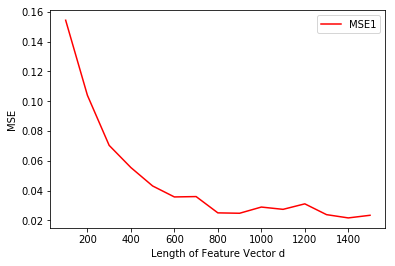

In [817]:
MSEvsD(15, 10000, 100, N_S + 500, 100, 1e-7) # loc = 5, alpha: 1e-7
# non diminishing learning rate

d: 100
  n: 0
      e1: 0.051265746230081004
  n: 1
      e1: 0.02601560010053273
  n: 2
      e1: 0.013672742862371912
  n: 3
      e1: 0.014696981309928678
  n: 4
      e1: 0.020628564038607366
  n: 5
      e1: 0.03367921324648918
  n: 6
      e1: 0.016469786608746914
  n: 7
      e1: 0.029522232961328783
  n: 8
      e1: 0.034908194171456484
  n: 9
      e1: 0.013742952290119861
d: 200
  n: 0
      e1: 0.041864607699826084
  n: 1
      e1: 0.01951748149983803
  n: 2
      e1: 0.02623111657154509
  n: 3
      e1: 0.008512950447846699
  n: 4
      e1: 0.020831418651385054
  n: 5
      e1: 0.03485934313685558
  n: 6
      e1: 0.01846848689445591
  n: 7
      e1: 0.03587913233892641
  n: 8
      e1: 0.021758665736507445
  n: 9
      e1: 0.03316604398422413
d: 300
  n: 0
      e1: 0.014981672237810764
  n: 1
      e1: 0.03716836187608952
  n: 2
      e1: 0.03612183378311775
  n: 3
      e1: 0.04221702863385969
  n: 4
      e1: 0.029087776165529634
  n: 5
      e1: 0.03127895099338547
  n

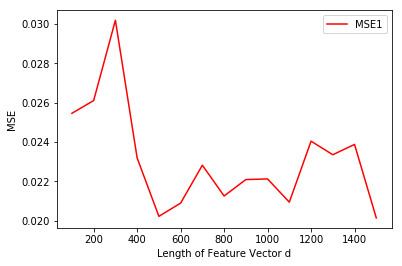

In [626]:
MSEvsD(10, 100000, 100, N_S + 500, 100, 1e-7) # loc = 5, alpha: 1e-7
# non diminishing learning rate

d: 100
  n: 0
      e1: 0.12124793801137887
  n: 1
      e1: 0.1365175482669178
  n: 2
      e1: 0.1190759245524228
  n: 3
      e1: 0.13111566238769756
  n: 4
      e1: 0.11276824289991533
  n: 5
      e1: 0.12084576416963415
  n: 6
      e1: 0.14390909571849284
  n: 7
      e1: 0.10830875932382669
  n: 8
      e1: 0.12536348700594996
  n: 9
      e1: 0.12776232050029032
d: 200
  n: 0
      e1: 0.08744706201715051
  n: 1
      e1: 0.06337782967597023
  n: 2
      e1: 0.06328317883880004
  n: 3
      e1: 0.0568084221078927
  n: 4
      e1: 0.06246949733518554
  n: 5
      e1: 0.05941135115653125
  n: 6
      e1: 0.04808875446200393
  n: 7
      e1: 0.052033485810353636
  n: 8
      e1: 0.05661347803527615
  n: 9
      e1: 0.06797756254820705
d: 300
  n: 0
      e1: 0.02646998947045154
  n: 1
      e1: 0.03883448672262297
  n: 2
      e1: 0.03145758234826764
  n: 3
      e1: 0.027269112865457794
  n: 4
      e1: 0.03995755450936829
  n: 5
      e1: 0.03500681483830049
  n: 6
      e1: 0

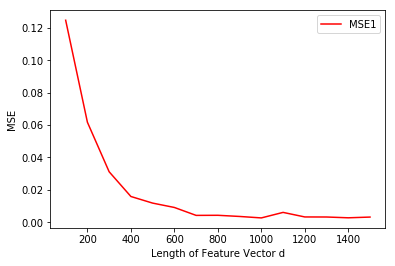

In [1350]:
# same as above
MSEvsD(10, 100000, 100, N_S + 500, 100, 1e-5) # loc = 20, alpha: 1e-5
# diminishing learning rate

d: 100
  n: 0
      e1: 0.16034339251589358
      e2: 15.826857700631907
  n: 1
      e1: 0.15962093214246806
      e2: 15.739066109374166
  n: 2
      e1: 0.15781475660986266
      e2: 15.561658397423548
d: 200
  n: 0
      e1: 0.10865725378167951
      e2: 10.630834719763449
  n: 1
      e1: 0.10483887051353673
      e2: 10.259447241757869
  n: 2
      e1: 0.08979911633384563
      e2: 8.69829239705827
d: 300
  n: 0
      e1: 0.08627742861684587
      e2: 8.401516621498283
  n: 1
      e1: 0.0841995025646696
      e2: 8.191504250592507
  n: 2
      e1: 0.07580765530982328
      e2: 7.344796455377893
d: 400
  n: 0
      e1: 0.04198767385600377
      e2: 3.933292369489858
  n: 1
      e1: 0.05797569448940224
      e2: 5.535236019143843
  n: 2
      e1: 0.05279881386899579
      e2: 5.014414674249966
d: 500
  n: 0
      e1: 0.04542092766057895
      e2: 4.298176135206657
  n: 1
      e1: 0.033592891976943096
      e2: 3.119442094935204
  n: 2
      e1: 0.03833691606053895
      e2: 3.57

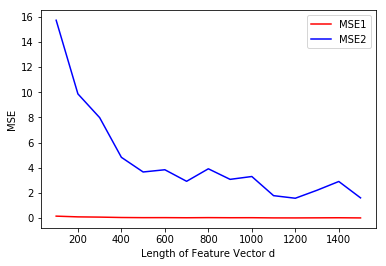

In [822]:
MSEvsD(3, 10000, 100, N_S + 500, 100, 1e-7) # loc = 5, alpha: 1e-7
# non diminishing lr

d: 100
  n: 0
      e1: 0.04075411091411051
      e2: 3.4639538903108575
  n: 1
      e1: 0.029979163400156883
      e2: 2.3617453055025397
  n: 2
      e1: 0.01356211014172687
      e2: 0.3809725454098816
d: 200
  n: 0
      e1: 0.027587029204810213
      e2: 2.33436842487356
  n: 1
      e1: 0.011477823238968779
      e2: 0.6318579929777841
  n: 2
      e1: 0.029792640903875133
      e2: 2.549722337696086
d: 300
  n: 0
      e1: 0.023804599659681337
      e2: 2.027958208653987
  n: 1
      e1: 0.035824157110901214
      e2: 3.2815579400036006
  n: 2
      e1: 0.06002652646244652
      e2: 5.74283956355147
d: 400
  n: 0
      e1: 0.02699271720150099
      e2: 2.398756503898647
  n: 1
      e1: 0.015645410067441502
      e2: 1.2531767545808061
  n: 2
      e1: 0.02016253242942433
      e2: 1.7252665433563612
d: 500
  n: 0
      e1: 0.030343854701524613
      e2: 2.770258257453676
  n: 1
      e1: 0.02237611396900459
      e2: 1.9434152193598158
  n: 2
      e1: 0.02727597073267525
    

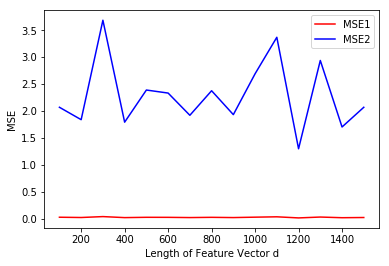

In [823]:
MSEvsD(3, 100000, 100, N_S + 500, 100, 1e-7) # loc = 5, alpha: 1e-7
# non diminishing lr

d: 100
  n: 0
      e1: 0.0023670533208903152
      e2: 0.011865038161539021
  n: 1
      e1: 0.0035238112068694534
      e2: 0.13095171570908581
  n: 2
      e1: 0.002466674721583229
      e2: 0.009207088313285688
  n: 3
      e1: 0.002307901200030221
      e2: 0.0026945299924064758
  n: 4
      e1: 0.002359282057080238
      e2: 0.018622846238604097
  n: 5
      e1: 0.0032047620973356347
      e2: 0.10013732731701182
  n: 6
      e1: 0.0023959355219823008
      e2: 0.005025499110739633
  n: 7
      e1: 0.0036678532607267943
      e2: 0.1318822255265051
  n: 8
      e1: 0.002733719906096338
      e2: 0.038053110639107816
  n: 9
      e1: 0.0024077942779851705
      e2: 0.01057183520762796
d: 200
  n: 0
      e1: 0.004018533657240276
      e2: 0.20273899898792172
  n: 1
      e1: 0.0020793203325176674
      e2: 0.009090384314527356
  n: 2
      e1: 0.0022520115507223357
      e2: 0.036612004953546065
  n: 3
      e1: 0.0036328107774614934
      e2: 0.16616876575093675
  n: 4
      e1: 

      e1: 0.001800804509960137
      e2: 0.011754619364978305
  n: 9
      e1: 0.0021372506622421394
      e2: 0.043202154774244744
d: 1300
  n: 0
      e1: 0.0020602340267979117
      e2: 0.03852266175058122
  n: 1
      e1: 0.002231410187075466
      e2: 0.05319015617276585
  n: 2
      e1: 0.0017430144824608816
      e2: 0.006913939297678115
  n: 3
      e1: 0.002557643812554678
      e2: 0.0871127401067024
  n: 4
      e1: 0.0017137107984308477
      e2: 0.0028578393582298334
  n: 5
      e1: 0.005688524926324018
      e2: 0.3996120806172812
  n: 6
      e1: 0.0019755581520679343
      e2: 0.03169110409406503
  n: 7
      e1: 0.003482224276143065
      e2: 0.17968263726091344
  n: 8
      e1: 0.0019043634983873755
      e2: 0.019756453049547745
  n: 9
      e1: 0.0042829400783980735
      e2: 0.2588948607011956
d: 1400
  n: 0
      e1: 0.0017197752751165433
      e2: 0.005786388609254963
  n: 1
      e1: 0.001748766054676011
      e2: 0.005641262270262375
  n: 2
      e1: 0.0017051

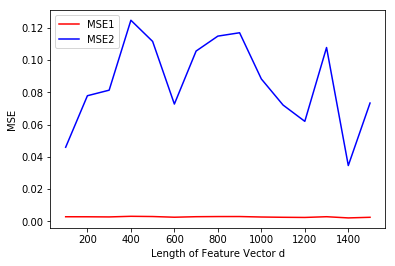

In [1276]:
MSEvsD(10, 10000, 100, N_S + 500, 100, 1e-5)
# non diminishing lr

d: 100
  n: 0
      e1: 0.13827948173028376
  n: 1
      e1: 0.13318836173686902
  n: 2
      e1: 0.13689221280094485
  n: 3
      e1: 0.14591892271534712
  n: 4
      e1: 0.1534937861590113
  n: 5
      e1: 0.12859110959263895
  n: 6
      e1: 0.15774713358225
  n: 7
      e1: 0.14724168937328835
  n: 8
      e1: 0.15088926917466378
  n: 9
      e1: 0.14885181769825087
d: 200
  n: 0
      e1: 0.08020423570734479
  n: 1
      e1: 0.08751576252508046
  n: 2
      e1: 0.060439649344209534
  n: 3
      e1: 0.08218561712946293
  n: 4
      e1: 0.07518672459956485
  n: 5
      e1: 0.08505445870399216
  n: 6
      e1: 0.07218443481246561
  n: 7
      e1: 0.08443920875669252
  n: 8
      e1: 0.0879933238333428
  n: 9
      e1: 0.08953129720871913
d: 300
  n: 0
      e1: 0.08283906954142904
  n: 1
      e1: 0.05250691026338302
  n: 2
      e1: 0.03661919292731824
  n: 3
      e1: 0.0601895961951454
  n: 4
      e1: 0.07651572027392169
  n: 5
      e1: 0.041125235979459815
  n: 6
      e1: 0.05

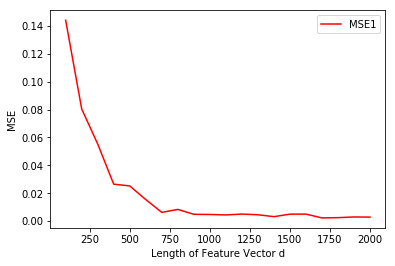

In [1348]:
MSEvsD(10, 10000, 100, N_S + 1000, 100, 1e-5) # loc = 5, alpha: 1e-7
# diminishing lr

In [620]:
gamma * (stateTransitionMatrix @ phi @ w + rewardMatrix)

array([[5.60615225],
       [5.55027063],
       [5.54484825],
       [5.53313153],
       [5.6008925 ],
       [5.44799809],
       [5.54780251],
       [5.50072252],
       [5.59814759],
       [5.55453867],
       [5.59418669],
       [5.48345513],
       [5.54379141],
       [5.56532587],
       [5.55441823],
       [5.57625863],
       [5.57543586],
       [5.49740629],
       [5.56600597],
       [5.56800697],
       [5.52369567],
       [5.58971084],
       [5.49986582],
       [5.55131047],
       [5.58506926],
       [5.58028473],
       [5.61370482],
       [5.56700033],
       [5.61809582],
       [5.5143523 ],
       [5.56743923],
       [5.5249271 ],
       [5.62507299],
       [5.57281478],
       [5.58112992],
       [5.53111405],
       [5.50680077],
       [5.55244938],
       [5.50570418],
       [5.52484468],
       [5.55133215],
       [5.56655972],
       [5.55519741],
       [5.58636305],
       [5.57560026],
       [5.52092507],
       [5.5268078 ],
       [5.500

In [447]:
V

array([[5.02751246],
       [5.02173325],
       [5.07049649],
       [4.99176857],
       [4.99282038],
       [5.07891027],
       [4.94346705],
       [5.09042323],
       [5.00724621],
       [4.9783579 ],
       [5.00540189],
       [4.9910889 ],
       [5.04488968],
       [5.0241933 ],
       [5.00213408],
       [4.96094775],
       [5.0543124 ],
       [4.98976845],
       [5.02266438],
       [5.03518703],
       [5.07566206],
       [5.08934715],
       [4.98518832],
       [5.04394482],
       [5.03553125],
       [5.04280005],
       [5.01796021],
       [5.12497162],
       [5.0493816 ],
       [4.95664636],
       [5.04837093],
       [4.92874357],
       [5.06237533],
       [4.97432898],
       [5.0723991 ],
       [4.94492459],
       [5.02291495],
       [4.93566786],
       [5.00349223],
       [4.97240436],
       [5.01158042],
       [4.95067948],
       [5.02038267],
       [5.01825818],
       [5.0030296 ],
       [5.02160704],
       [4.95984275],
       [4.991

# Question
- For MSE, do not compare with true value, instead compare with TD next step, check whether have converged, the ability to converge, instead of really trying to converge to true value